In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
'''
generating sample data from make_blobs
this particular setting has one distinct cluster and 3 clusters that are very close to each other
'''
X,y=make_blobs(n_samples=500,n_features=2, centers=4, cluster_std=1,center_box=(-10.0,10.0),shuffle=True, random_state=1)
range_n_clusters = [2, 3, 4, 5, 6]

In [8]:
print(X)
print(y)

[[-6.92324165e+00 -1.06695320e+01]
 [-8.63062033e+00 -7.13940564e+00]
 [-9.63048069e+00 -2.72044935e+00]
 [-2.30647659e+00  5.30797676e+00]
 [-7.57005366e+00 -3.01446491e+00]
 [-1.00051011e+00  2.77905153e+00]
 [-4.81826839e+00 -2.77214822e+00]
 [-5.33964799e+00 -1.27625764e+00]
 [-7.94308840e+00 -3.89993901e+00]
 [-5.54924525e+00 -3.41298968e+00]
 [-5.14508990e+00 -9.54492198e+00]
 [-7.09669936e+00 -8.04074036e+00]
 [-5.82641512e+00 -1.96346196e+00]
 [-1.83198811e+00  3.52863145e+00]
 [-7.34267235e+00 -3.16546482e+00]
 [-7.34072825e+00 -6.92427252e+00]
 [-7.94653906e+00 -3.36768655e+00]
 [-8.24598536e+00 -8.61315821e+00]
 [-1.98197711e+00  4.02243551e+00]
 [-4.35098035e+00 -3.69476678e+00]
 [-1.04768696e+01 -3.60318139e+00]
 [-1.10195984e+01 -3.15882031e+00]
 [-5.17255904e+00 -4.31835971e+00]
 [-2.40671820e+00  6.09894447e+00]
 [-6.72149498e+00 -2.88440806e+00]
 [-6.58935963e+00 -4.43379548e+00]
 [-1.46126019e+00  4.52549851e+00]
 [-9.19003455e-01  3.45278927e+00]
 [-1.04093517e+01 -2

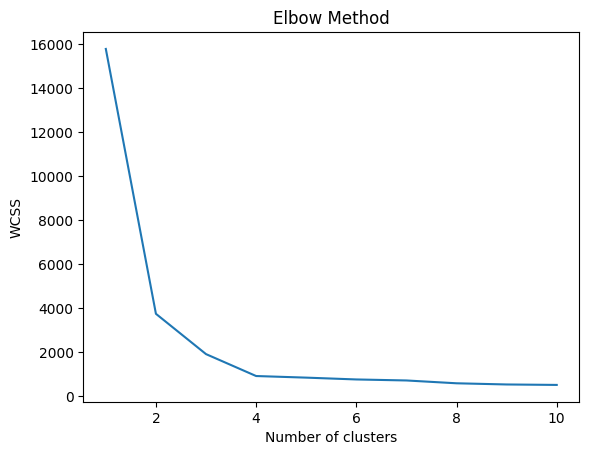

'\nin the elbow method the last abrupt change was by k=4. we will confirm using silhouette score\n'

In [10]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',  random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
'''
in the elbow method the last abrupt change was by k=4. we will confirm using silhouette score
'''

In [11]:
clusterer=KMeans(n_clusters=4,  random_state=10)
cluster_labels=clusterer.fit_predict(X)
print(cluster_labels)

[3 3 0 1 2 1 2 2 2 2 3 3 2 1 2 3 2 3 1 2 0 0 2 1 2 2 1 1 0 2 3 1 2 3 2 3 0
 0 3 0 2 0 1 2 2 3 0 2 1 1 1 0 0 2 3 0 0 0 0 2 1 1 0 2 1 2 3 2 0 0 3 0 2 3
 2 2 3 2 2 0 1 1 0 1 1 0 0 1 0 0 1 3 0 2 1 3 3 2 3 1 1 3 1 0 1 2 2 1 1 0 2
 3 1 0 1 0 1 2 1 2 0 3 3 0 2 0 1 3 3 2 1 0 0 0 0 3 1 2 1 1 2 3 2 1 1 1 2 2
 3 3 0 0 1 3 1 0 0 0 0 0 0 0 0 0 1 3 3 3 2 1 3 0 2 3 1 0 0 0 0 3 2 0 1 3 3
 0 2 3 3 2 1 1 3 3 2 1 2 3 3 1 3 0 1 2 2 3 2 0 3 2 0 2 0 3 2 2 2 1 0 1 2 3
 0 2 0 0 0 1 0 1 3 0 3 0 1 1 0 3 1 3 2 0 3 3 3 3 2 0 3 0 2 1 1 2 2 1 0 2 0
 1 2 1 0 0 1 2 3 3 0 0 0 2 1 1 2 1 0 3 1 3 1 3 3 1 3 1 1 2 0 0 0 2 2 0 3 1
 3 3 3 2 0 2 3 0 3 3 0 3 3 0 1 3 2 2 1 1 0 3 1 1 2 3 1 1 2 0 1 0 2 3 3 1 0
 3 2 1 1 2 2 2 3 2 1 1 0 1 1 1 1 3 3 2 1 0 2 3 1 0 1 2 1 0 2 0 1 2 2 3 1 3
 3 3 3 3 3 0 3 1 3 1 1 0 1 2 0 0 3 1 0 1 2 3 0 0 3 0 0 1 1 3 0 2 1 2 2 3 3
 2 3 0 0 3 0 3 0 1 3 1 0 2 1 0 2 1 3 2 1 1 0 2 0 2 3 1 3 2 1 3 3 3 0 1 2 3
 2 2 0 0 3 2 2 2 2 2 2 3 2 0 3 2 1 2 1 2 0 0 1 1 1 0 2 0 3 0 1 2 3 1 3 1 3
 2 1 1 3 0 2 3 0 0 0 3 2 

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


C:\Users\cyber\AppData\Local\Temp\ipykernel_3580\3275868503.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(X[:, 0], X[:, 1], c=colors, cmap='nipy_spectral', marker='.', s=15, alpha=0.7)


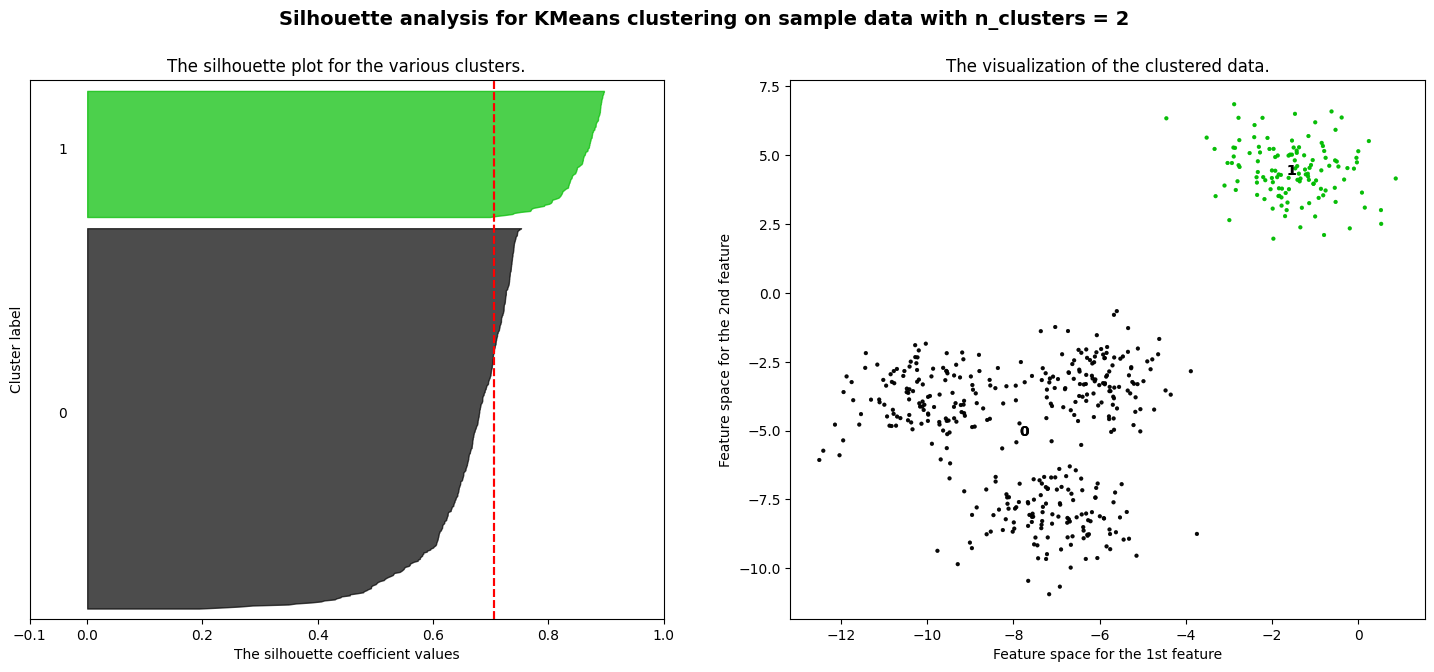

For n_clusters =

C:\Users\cyber\AppData\Local\Temp\ipykernel_3580\3275868503.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(X[:, 0], X[:, 1], c=colors, cmap='nipy_spectral', marker='.', s=15, alpha=0.7)


 3 The average silhouette_score is : 0.5882004012129721


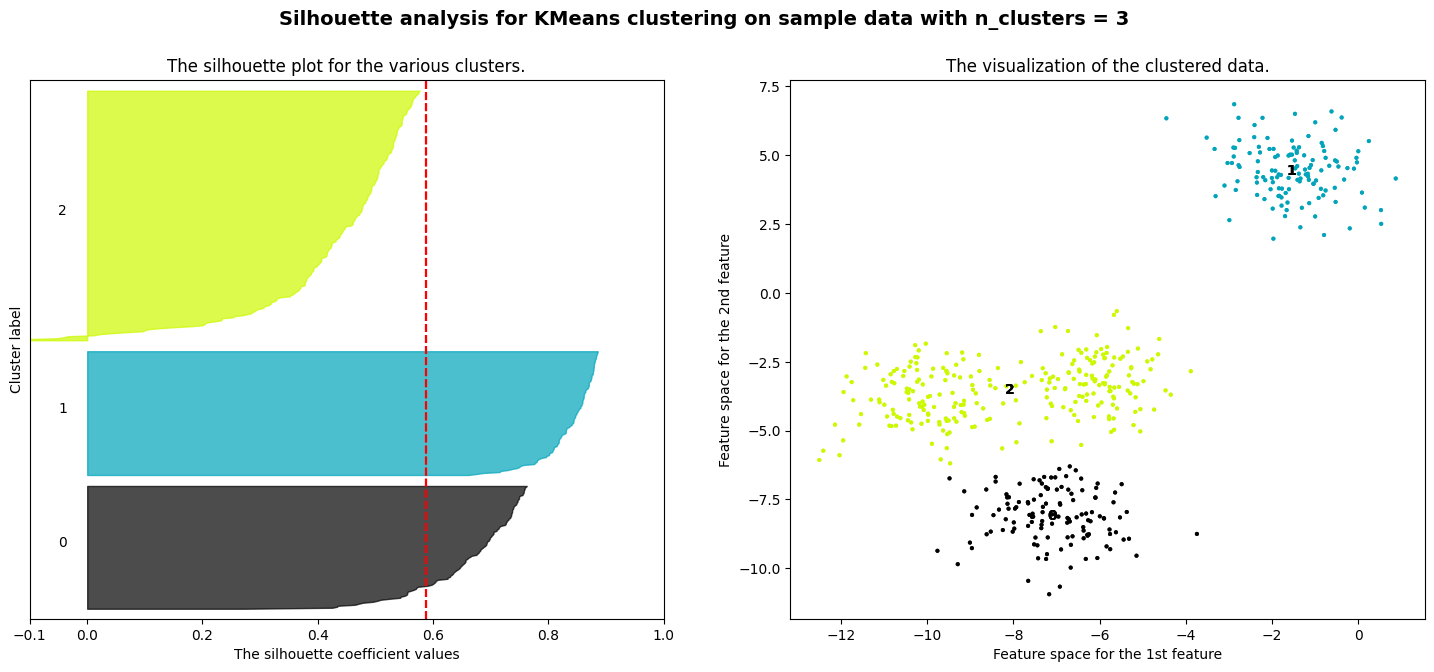

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


C:\Users\cyber\AppData\Local\Temp\ipykernel_3580\3275868503.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(X[:, 0], X[:, 1], c=colors, cmap='nipy_spectral', marker='.', s=15, alpha=0.7)


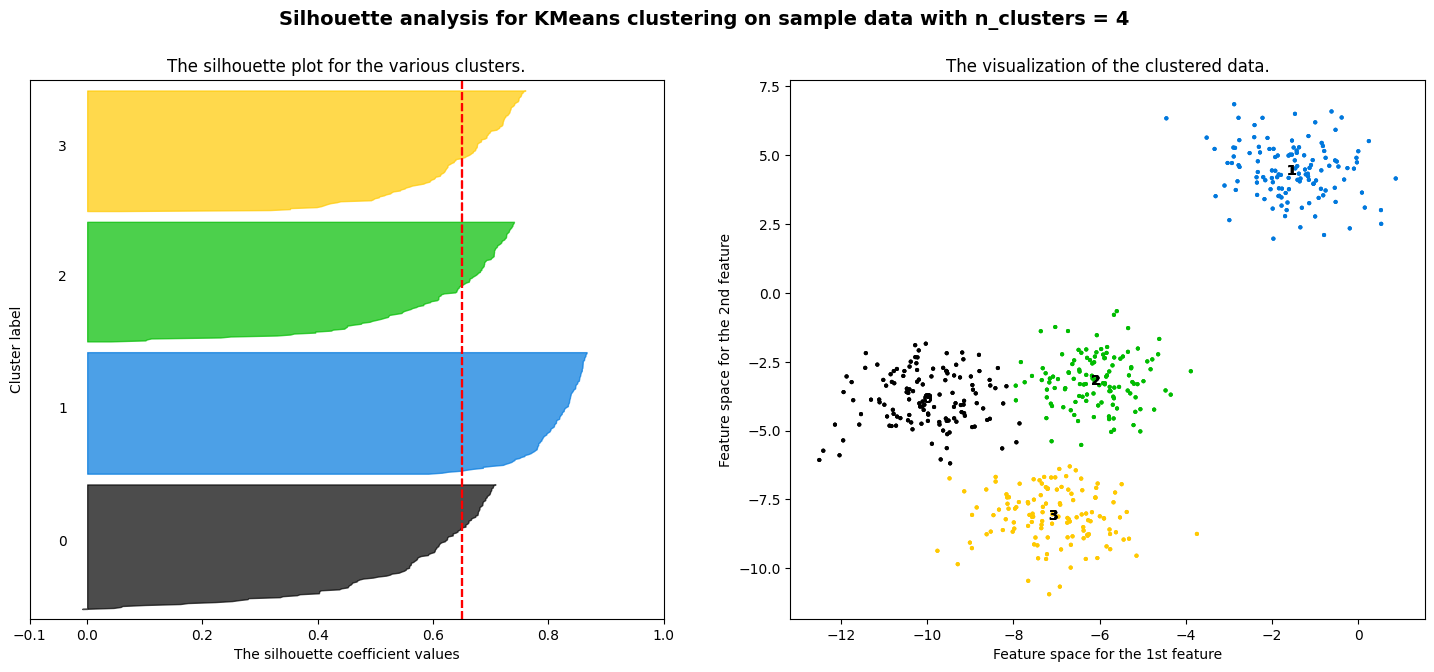

For n_clusters = 5 The average silhouette_score is : 0.561464362648773


C:\Users\cyber\AppData\Local\Temp\ipykernel_3580\3275868503.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(X[:, 0], X[:, 1], c=colors, cmap='nipy_spectral', marker='.', s=15, alpha=0.7)


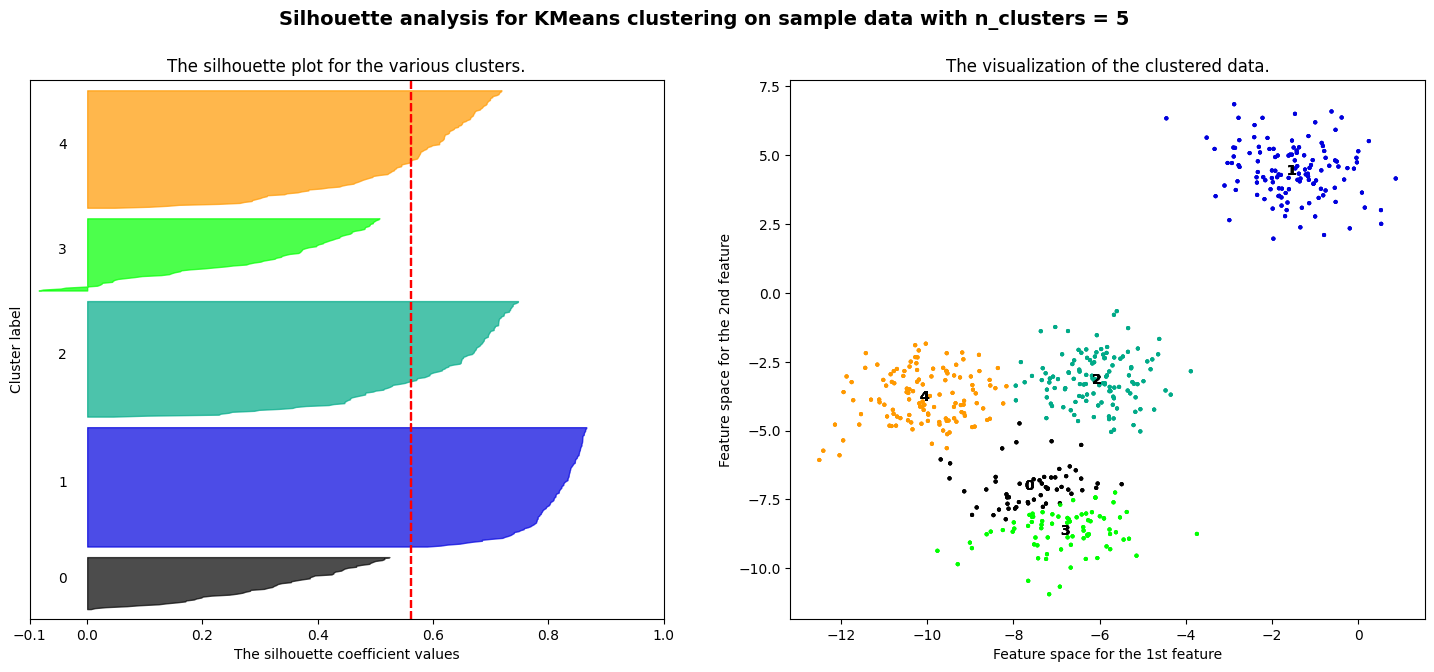

For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


C:\Users\cyber\AppData\Local\Temp\ipykernel_3580\3275868503.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(X[:, 0], X[:, 1], c=colors, cmap='nipy_spectral', marker='.', s=15, alpha=0.7)


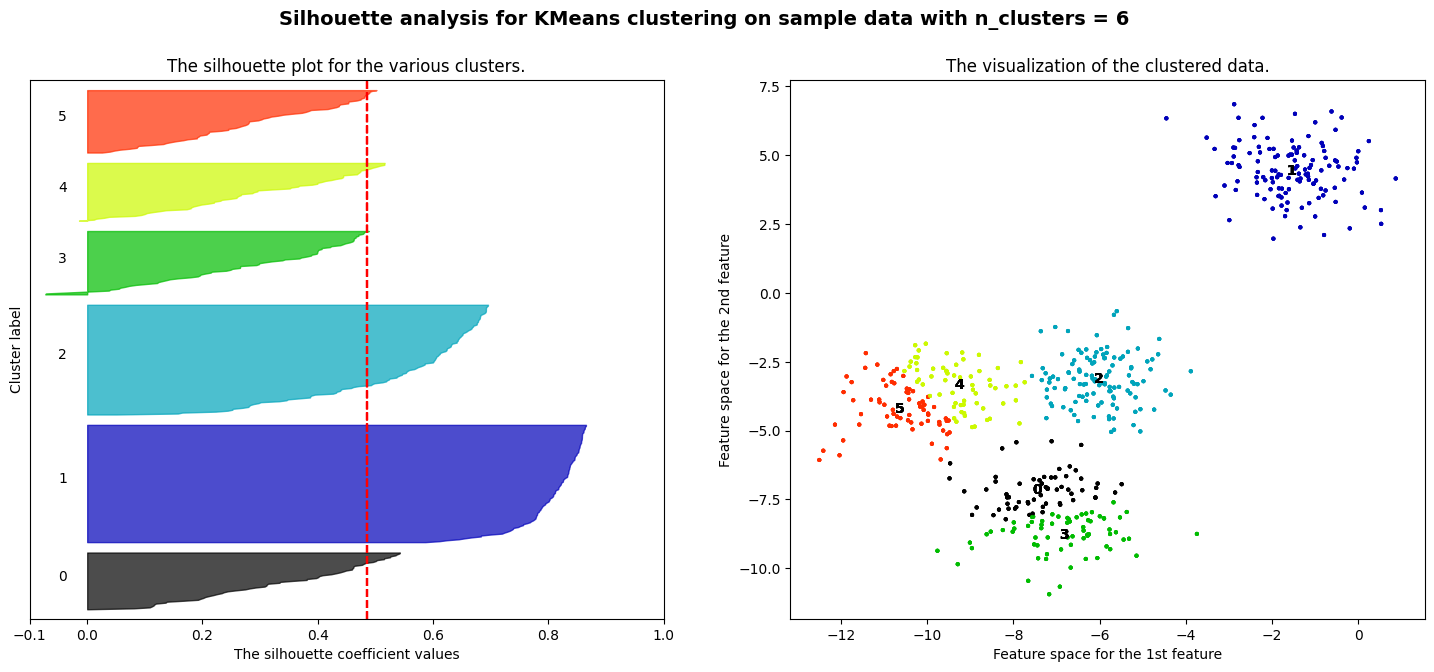

In [19]:
from matplotlib import colors


for n_clusters in range_n_clusters:
    fig,(ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer=KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower+0.5*size_cluster_i , str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        colors=cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        # Plot data points with smaller size and no outlines
        ax2.scatter(X[:, 0], X[:, 1], c=colors, cmap='nipy_spectral', marker='.', s=15, alpha=0.7)
        centers=clusterer.cluster_centers_
        # Plot cluster numbers at center positions
        for i, c in enumerate(centers):
            ax2.text(c[0], c[1], str(i), ha='center', va='center', fontweight='bold')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()